In [2]:
import os
import datetime

In [3]:
path_name = os.getcwd()
today = datetime.datetime.today()
month = today.strftime("%B")
year = today.year
folder = f"{month}{year}".lower()

In [4]:
from mta_gtfs_data_getter import download_gtfs_data

In [4]:
download_gtfs_data(folder)

Done! Check the may2025 folder


In [5]:
from mta_gtfs_shapefiles_maker import make_bus_routes_shapefiles, make_bus_stops_shapefiles, make_rail_routes_shapefiles, make_rail_stops_shapefiles, make_subway_entrances_shapefiles

In [6]:
rails = ["LIRR", "metro_north", "nyc_subway"]

In [7]:
for rail in rails:
    make_rail_routes_shapefiles(path=path_name, folder=folder, rail=rail)
    make_rail_stops_shapefiles(path=path_name, folder=folder, rail=rail)

/Users/zheee/miniconda3/envs/mta/lib/python3.13/site-packages/shapely/set_operations.py:421: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)


Created route shapefiles for LIRR
Created stop shapefiles for LIRR


/Users/zheee/miniconda3/envs/mta/lib/python3.13/site-packages/shapely/set_operations.py:421: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)


Created route shapefiles for metro_north
Created stop shapefiles for metro_north


/Users/zheee/miniconda3/envs/mta/lib/python3.13/site-packages/shapely/set_operations.py:421: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)
/Users/zheee/Documents/MTA-Mass-Transit/mta_gtfs_shapefiles_maker.py:437: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  rail_lines.to_file(
/Users/zheee/miniconda3/envs/mta/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'route_short' to 'route_shor'
  ogr_write(


Created route shapefiles for nyc_subway
Created stop shapefiles for nyc_subway


In [8]:
make_bus_routes_shapefiles(path=path_name, folder=folder)

/Users/zheee/miniconda3/envs/mta/lib/python3.13/site-packages/shapely/set_operations.py:421: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)
/Users/zheee/miniconda3/envs/mta/lib/python3.13/site-packages/shapely/set_operations.py:421: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)
/Users/zheee/miniconda3/envs/mta/lib/python3.13/site-packages/shapely/set_operations.py:421: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)
/Users/zheee/miniconda3/envs/mta/lib/python3.13/site-packages/shapely/set_operations.py:421: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)


Created line shapefiles for local and express bus routes


/Users/zheee/miniconda3/envs/mta/lib/python3.13/site-packages/shapely/set_operations.py:421: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)
/Users/zheee/Documents/MTA-Mass-Transit/mta_gtfs_shapefiles_maker.py:637: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  local_route_gdf.to_file(
/Users/zheee/miniconda3/envs/mta/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'route_short' to 'route_shor'
  ogr_write(
/Users/zheee/Documents/MTA-Mass-Transit/mta_gtfs_shapefiles_maker.py:649: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  express_route_gdf.to_file(
/Users/zheee/miniconda3/envs/mta/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'route_short' to 'route_shor'
  ogr_write(


In [9]:
make_bus_stops_shapefiles(path=path_name, folder=folder)

Created stop shapefiles for local and express bus stops


In [10]:
make_subway_entrances_shapefiles(path=path_name, folder=folder)

Created subway entrances shapefiles


### Zip files for release

In [21]:
from pathlib import Path
import zipfile

In [22]:
shapes_path = Path(folder) / 'shapes'
for shp_file in shapes_path.glob('*.shp'):
    # remove the previous zipfile
    zip_file_path = shapes_path / (shp_file.stem + '.zip')
    if zip_file_path.exists():
        zip_file_path.unlink()

    # get stem and all files that are not zips
    files_to_zip = [i for i in shapes_path.glob(shp_file.stem + '.*') if i.suffix != 'zip']

    with zipfile.ZipFile(zip_file_path, 'w') as zip_file:
        for f in files_to_zip:   
            zip_file.write(f, arcname=Path(f).name)

### Map shapefiles

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [12]:
routes_subway=gpd.read_file(f'./{folder}/shapes/routes_nyc_subway_{folder.lower()}.shp')
stops_subway=gpd.read_file(f'./{folder}/shapes/stops_nyc_subway_{folder.lower()}.shp')

In [13]:
routes_subway.head()

,route_id,route_shor,route_long,color,group,geometry
0,1,1,Broadway - 7 Avenue Local,#EE352E,123,"MULTILINESTRING ((980461.352 195059.068, 98014..."
1,2,2,7 Avenue Express,#EE352E,123,"MULTILINESTRING ((998782.495 169839.939, 99856..."
2,3,3,7 Avenue Express,#EE352E,123,"MULTILINESTRING ((1016408.941 182025.05, 10149..."
3,4,4,Lexington Avenue Express,#00933C,456,"MULTILINESTRING ((1002852.571 182980.733, 1000..."
4,5,5,Lexington Avenue Express,#00933C,456,"MULTILINESTRING ((1019254.677 246027.344, 1019..."


In [14]:
stops_subway.head()

,stop_id,stop_name,stop_lat,stop_lon,trains,structure,stop_id2,GEOID,NAMELSAD,geometry
0,101,Van Cortlandt Park-242 St,40.889248,-73.898583,1,Elevated,None,36005,Bronx County,POINT (1012291.156 263271.208)
1,103,238 St,40.884667,-73.900870,1,Elevated,None,36005,Bronx County,POINT (1011660.704 261601.442)
2,104,231 St,40.878856,-73.904834,1,Elevated,None,36005,Bronx County,POINT (1010566.908 259483.047)
3,106,Marble Hill-225 St,40.874561,-73.909831,1,Elevated,None,36061,New York County,POINT (1009186.665 257916.747)
4,107,215 St,40.869444,-73.915279,1,Elevated,None,36061,New York County,POINT (1007681.798 256050.919)


In [15]:
routes_subway.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

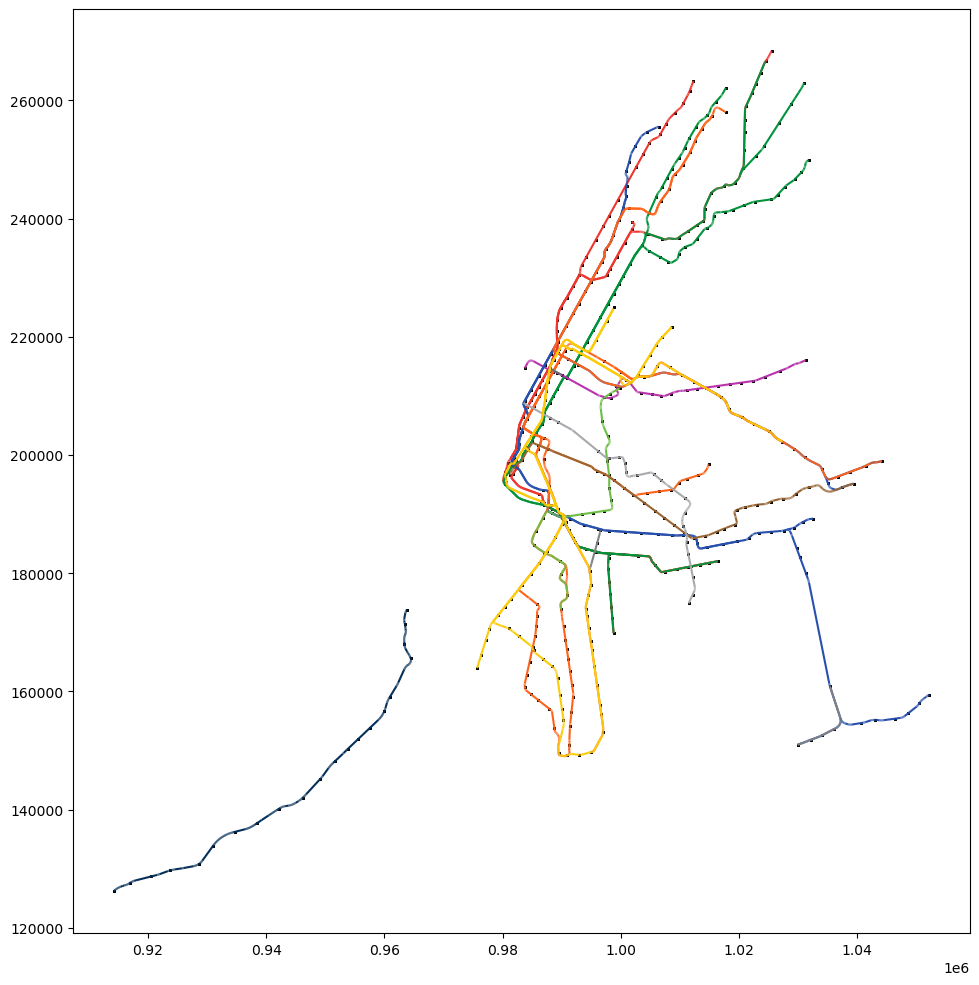

In [16]:
def plotRoutesAndStops(ax, routes, stops):
    #plot each color group
    for color in list(routes.color.unique()):
        routes[routes.color == color].plot(color= color, ax = ax)
    #plot subway stops
        stops.plot(color = 'black', ax = ax,  markersize = 0.5)
        
fig, ax = plt.subplots(figsize=(12,12))
plotRoutesAndStops(ax, routes_subway, stops_subway)

/var/folders/_9/22g8dlnn2g19gx8cn69ts65r0000gn/T/ipykernel_8079/2250203846.py:6: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  stops.plot(color = 'black', ax = ax,  markersize = 0.5)
/var/folders/_9/22g8dlnn2g19gx8cn69ts65r0000gn/T/ipykernel_8079/2250203846.py:6: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  stops.plot(color = 'black', ax = ax,  markersize = 0.5)
/var/folders/_9/22g8dlnn2g19gx8cn69ts65r0000gn/T/ipykernel_8079/2250203846.py:6: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  stops.plot(color = 'black', ax = ax,  markersize = 0.5)
/var/folders/_9/22g8dlnn2g19gx8cn69ts65r0000gn/T/ipykernel_8079/2250203846.py:6: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  stops.plot(color = 'black', ax = ax,  markersize = 0.5)
/var/folders/_9/22g8dlnn2g19gx8cn69ts65r0000gn/T/ipykernel_8079/

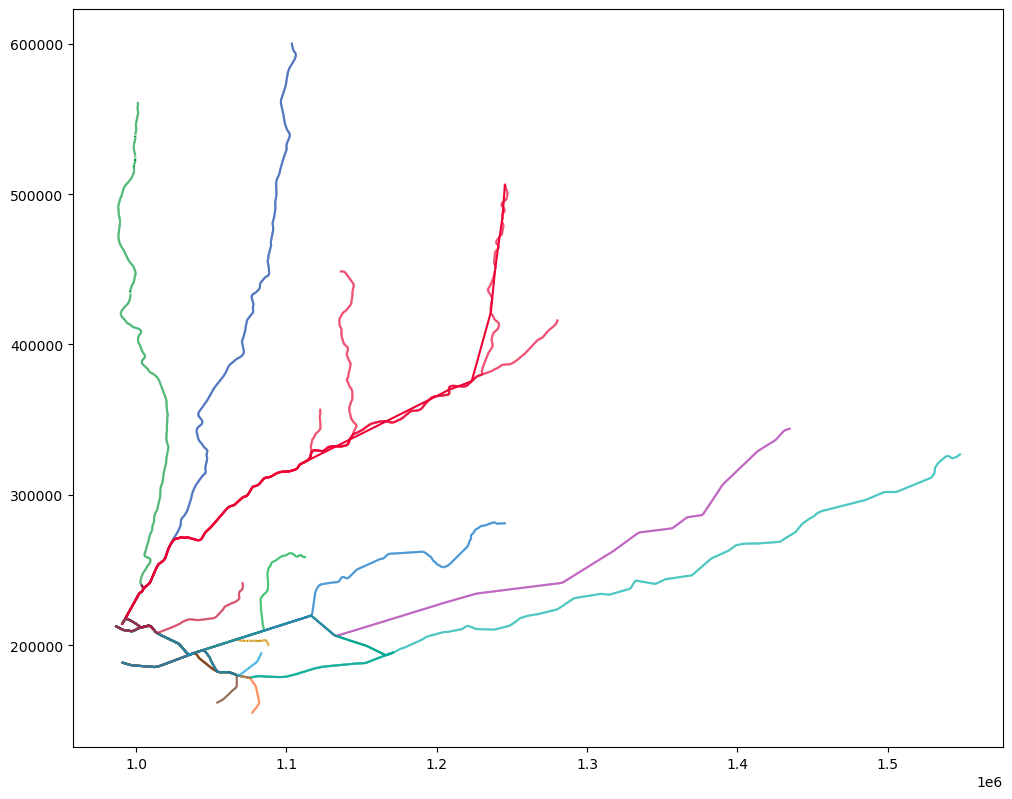

In [17]:
#plot both the Metro North and Long Island Railroad
routes_metro_north=gpd.read_file(f'./{folder}/shapes/routes_metro_north_{folder.lower()}.shp')
stops_metro_north=gpd.read_file(f'./{folder}/shapes/stops_metro_north_{folder.lower()}.shp')
routes_LIRR=gpd.read_file(f'./{folder}/shapes/routes_LIRR_{folder.lower()}.shp')
stops_LIRR=gpd.read_file(f'./{folder}/shapes/stops_LIRR_{folder.lower()}.shp')

fig, ax = plt.subplots(figsize=(12,12))
plotRoutesAndStops(ax, routes_metro_north, stops_metro_north)
plotRoutesAndStops(ax, routes_LIRR, stops_LIRR)

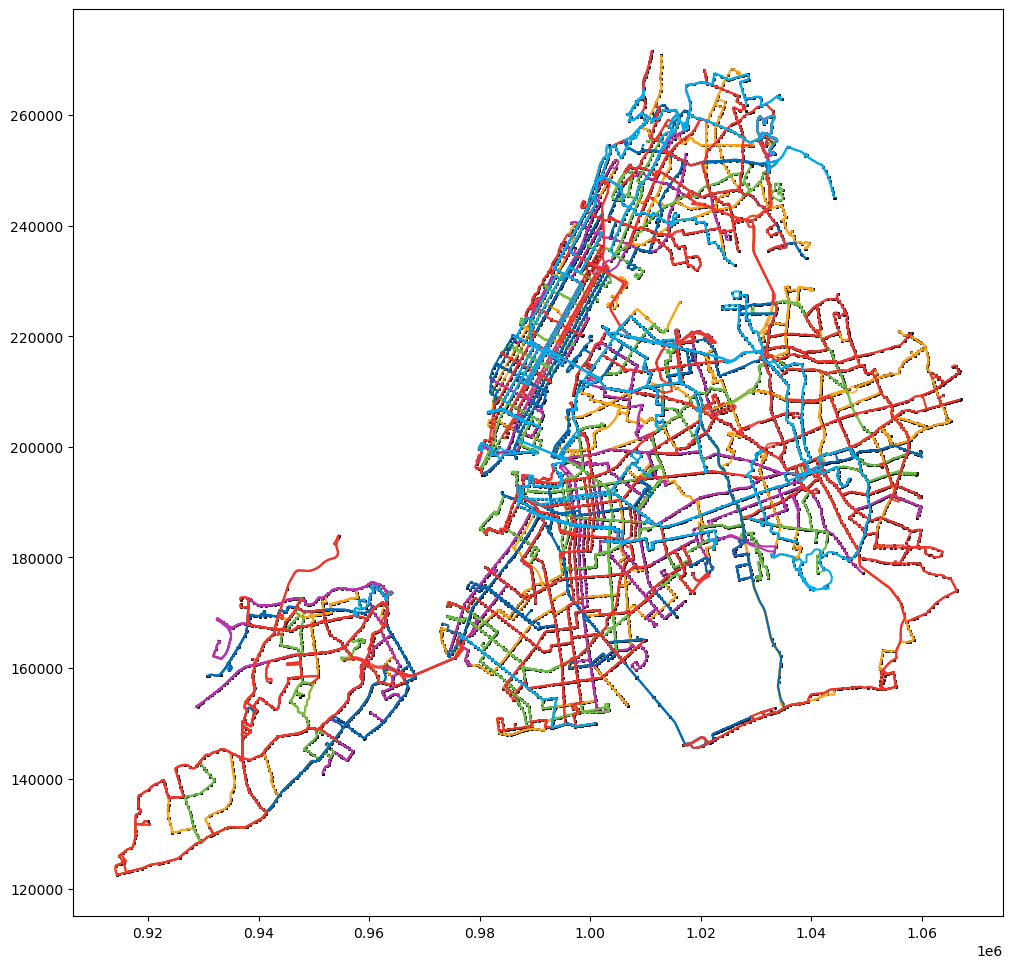

In [18]:
#do the same for buses
routes_bus = gpd.read_file(f'./{folder}/shapes/bus_routes_nyc_{folder.lower()}.shp')
stops_bus = gpd.read_file(f'./{folder}/shapes/bus_stops_nyc_{folder.lower()}.shp')
fig, ax = plt.subplots(figsize=(12,12))
plotRoutesAndStops(ax, routes_bus, stops_bus)

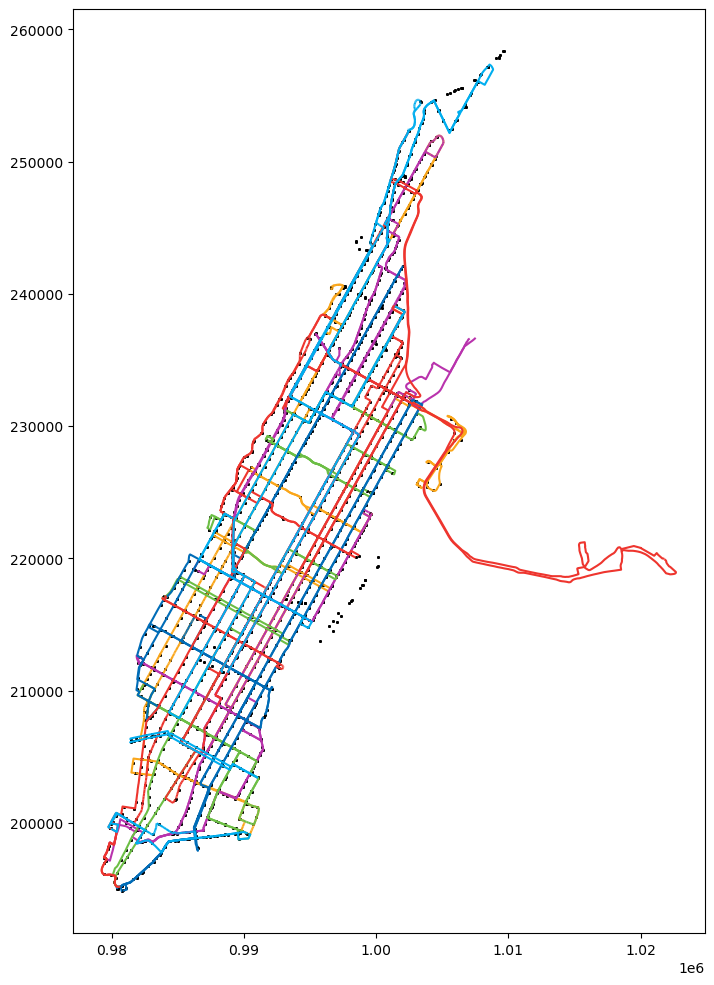

In [19]:
#map only a boro
fig, ax = plt.subplots(figsize=(12,12))
mn_routes_bus = routes_bus[routes_bus.route_id.str.contains('M')]
mn_routes_stops = stops_bus[stops_bus.NAMELSAD == 'New York County']
plotRoutesAndStops(ax, mn_routes_bus, mn_routes_stops)

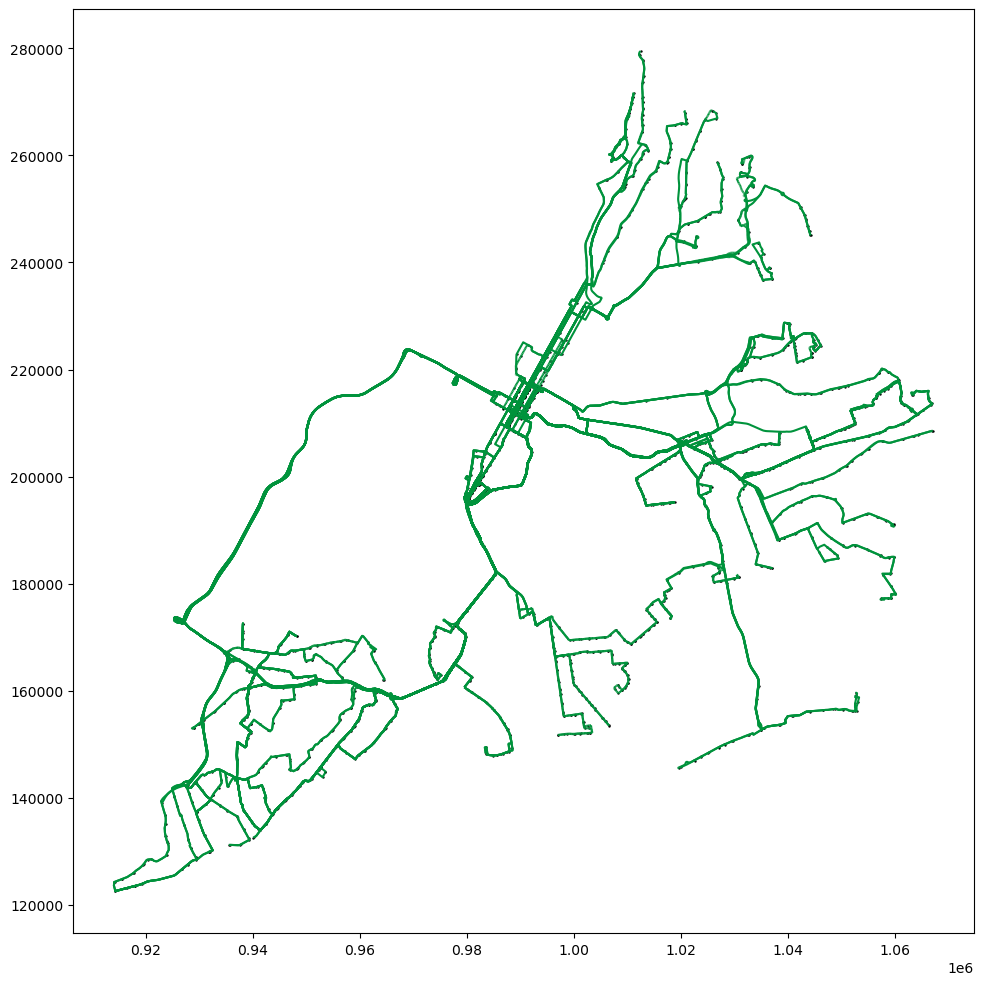

In [20]:
#express buses
routes_express_bus = gpd.read_file(f'./{folder}/shapes/express_bus_routes_nyc_{folder.lower()}.shp')
stops_express_bus = gpd.read_file(f'./{folder}/shapes/express_bus_stops_nyc_{folder.lower()}.shp')
fig, ax = plt.subplots(figsize=(12,12))
plotRoutesAndStops(ax, routes_express_bus, stops_express_bus)